In [1]:
pip install statsmodels


     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.8 kB ? eta -:--:--
     ------------------- ------------------ 30.7/60.8 kB 330.3 kB/s eta 0:00:01
     ------------------- ------------------ 30.7/60.8 kB 330.3 kB/s eta 0:00:01
     -------------------------------- ----- 51.2/60.8 kB 327.7 kB/s eta 0:00:01
     -------------------------------- ----- 51.2/60.8 kB 327.7 kB/s eta 0:00:01
     -------------------------------- ----- 51.2/60.8 kB 327.7 kB/s eta 0:00:01
     -------------------------------- ----- 51.2/60.8 kB 327.7 kB/s eta 0:00:01
     -------------------------------- ----- 51.2/60.8 kB 327.7 kB/s eta 0:00:01
     -------------------------------------- 60.8/60.8 kB 170.7 kB/s eta 0:00:00
  Using cached patsy-0.5.6-py2.py3-none-any.whl.metadata (3.5 kB)
   -

In [3]:
import numpy as np 
import seaborn as sns 
import pandas as pd 
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# set a random seed for responsibility 
np.random.seed(0)

# ceate a time series of 200 points
n = 200
t = np.arange(n)

# create a simple trend of 0.1 * t * randome noise
data = 0.1 * t + np.random.randn(n)

# convert to pandas series for convenience
s = pd.Series(data)

In [8]:
s.head()

0    1.764052
1    0.500157
2    1.178738
3    2.540893
4    2.267558
dtype: float64

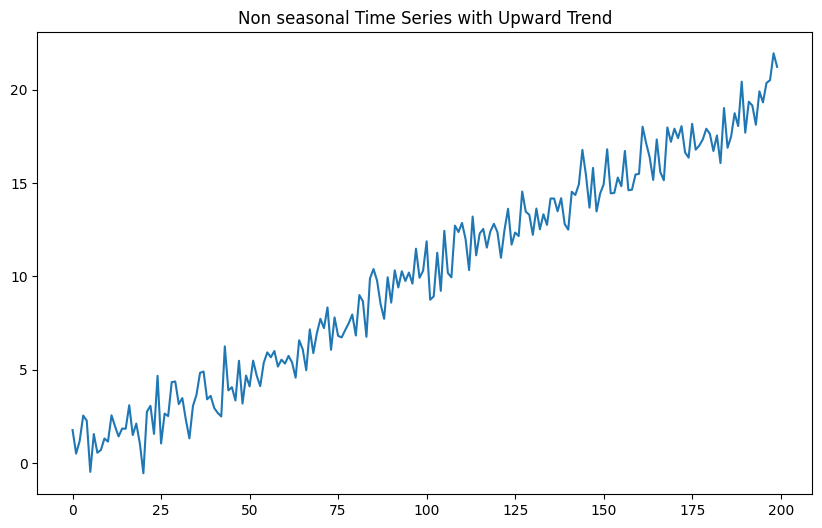

In [5]:

plt.figure(figsize=(10,6))
plt.plot(s)
plt.title("Non seasonal Time Series with Upward Trend")
plt.show()

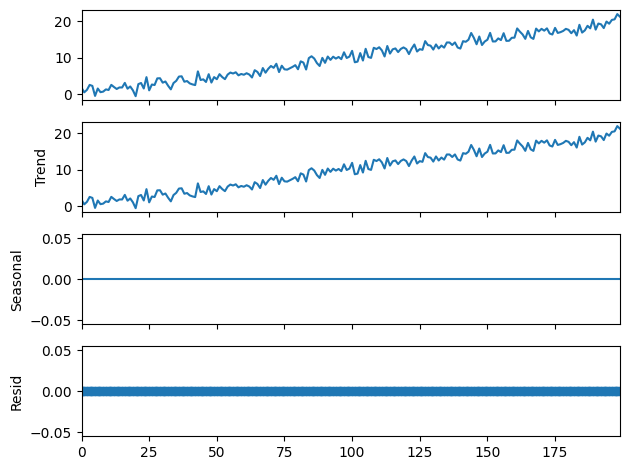

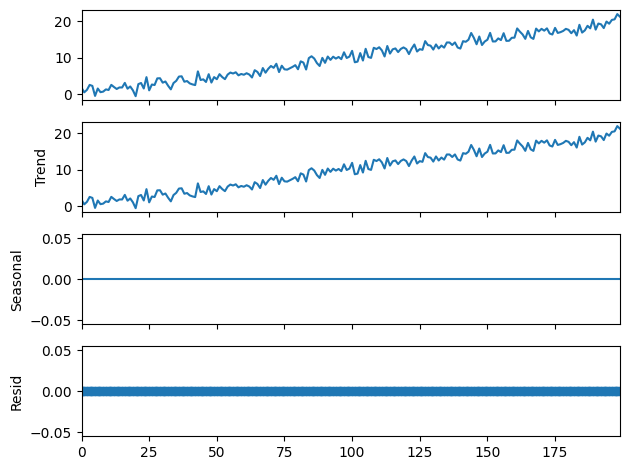

In [7]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(s , model = 'additive' , period = 1)
decomposition.plot()

200    21.622241
201    21.417517
202    21.526178
203    21.468504
204    21.499115
Name: predicted_mean, dtype: float64


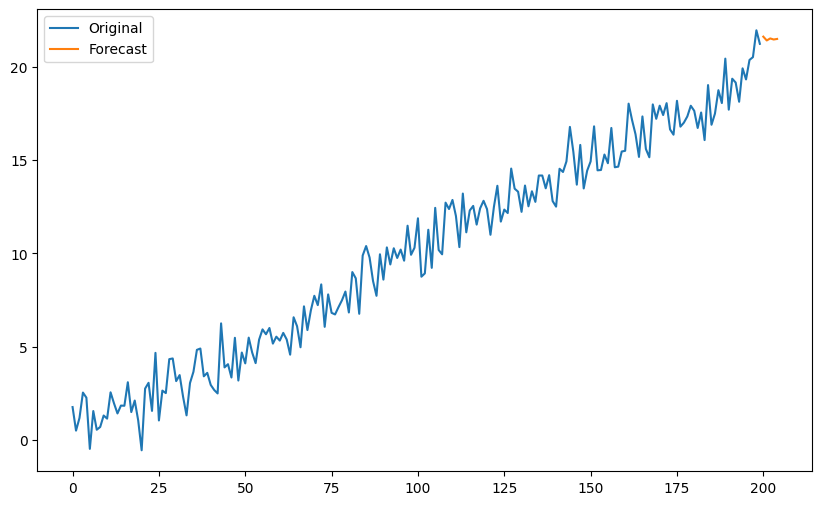

In [11]:
# fit the ARIMA model to our time series 
model = ARIMA(s , order=(1,1,0))
                        #p,q,d
model_fit = model.fit()

# generate a forecast 
forecast = model_fit.forecast(steps=5)

# print the forecast 
print(forecast)

# plot the original and forecast values
plt.figure(figsize=(10,6))
plt.plot(s , label = 'Original')
plt.plot(forecast , label = 'Forecast')
plt.legend(loc = 'best')
plt.show()

In [12]:
from statsmodels.tsa.stattools import adfuller
import pandas as pd

# Example time series data
data = [120, 135, 150, 165, 180, 195, 210, 225, 240, 255, 270, 285, 300, 315, 330, 345, 360, 375, 390, 405, 420, 435, 450, 465]
series = pd.Series(data)

# Perform ADF test
result = adfuller(series)
print('ADF Statistic:', result[0])
print('p-value:', result[1])

# Differencing if needed
diff_series = series.diff().dropna()


ADF Statistic: 2.654238668649873
p-value: 0.9990832286546545


In [19]:
diff_series

1     15.0
2     15.0
3     15.0
4     15.0
5     15.0
6     15.0
7     15.0
8     15.0
9     15.0
10    15.0
11    15.0
12    15.0
13    15.0
14    15.0
15    15.0
16    15.0
17    15.0
18    15.0
19    15.0
20    15.0
21    15.0
22    15.0
23    15.0
dtype: float64

c:\Users\Glow computers\miniconda3\envs\wscraping\Lib\site-packages\statsmodels\regression\linear_model.py:1491: ValueWarning: Matrix is singular. Using pinv.
  warnings.warn("Matrix is singular. Using pinv.", ValueWarning)


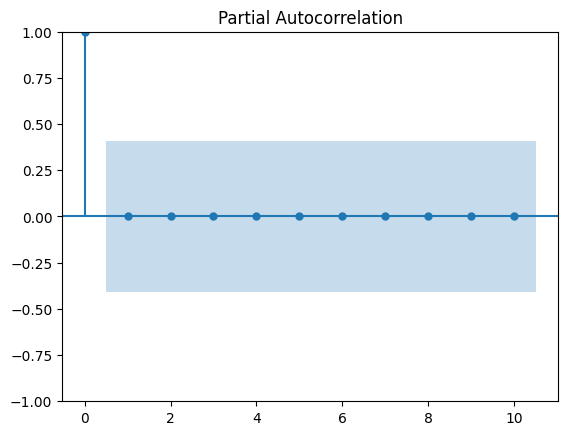

In [14]:
from statsmodels.graphics.tsaplots import plot_pacf
import matplotlib.pyplot as plt

# PACF plot
plot_pacf(diff_series, lags=10)
plt.show()


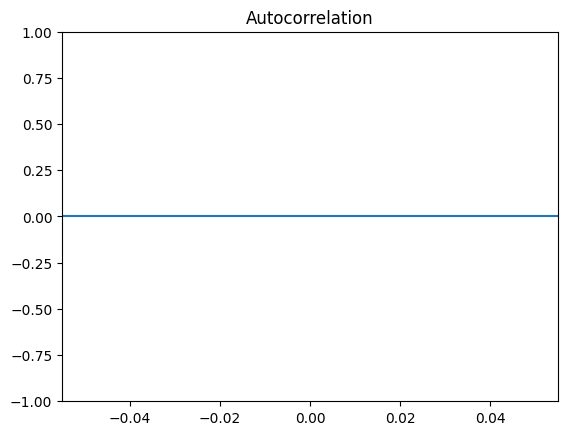

In [18]:
from statsmodels.graphics.tsaplots import plot_acf

# ACF plot
plot_acf(diff_series, lags=10)
plt.show()


145    465.296655
146    500.666283
147    535.971813
148    561.689718
149    571.313477
150    562.973002
151    539.729896
152    508.528674
153    478.147621
154    456.747366
Name: predicted_mean, dtype: float64


c:\Users\Glow computers\miniconda3\envs\wscraping\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<Axes: >

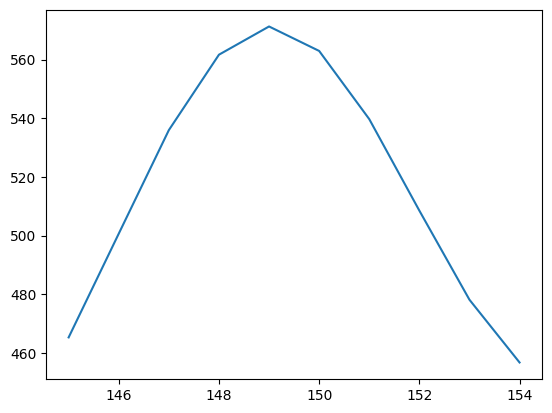

In [27]:
import pandas as pd 
from statsmodels.tsa.arima.model import ARIMA

# load a sample dataset, We'll use the "Air Passenger" dataset
df = pd.read_csv("./Dataset of Passengers/international-airline-passengers.csv")

# for this example we will use an ARIMA(2,1,2) model
model = ARIMA(df['International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60'] , order = [2,1,2])

# fit the model 
model_fit = model.fit()

# Make a predictions
prediction = model_fit.forecast(steps=10)

print(prediction)

# plot the prediction
prediction.plot()

In [26]:
df.head()

,Month,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [29]:
# Adfuller Test to test the stationarity
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(df['International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60'].dropna())
print("ADF Statistics: %f" % result[0])
print("P value: %f" % result[1])

print("Is Data Stationary?", result[1]<0.05)

ADF Statistics: 0.815369
P value: 0.991880
Is Data Stationary? False


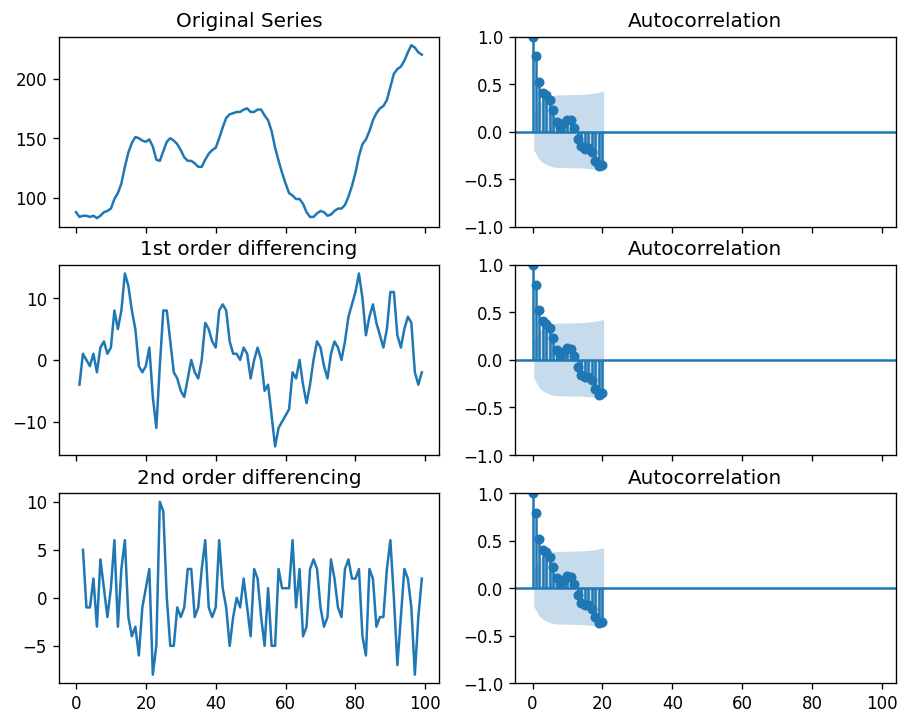

In [32]:
import numpy as np 
from statsmodels.graphics.tsaplots import plot_acf , plot_pacf
import matplotlib.pyplot as plt

plt.rcParams.update({'figure.figsize':(9,7) , 'figure.dpi':120})

# import the data
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/wwwusage.csv', names=['value'] , header=0)

# original series
fig , axes = plt.subplots(3,2,sharex= True)
axes[0,0].plot(df.value); axes[0,0].set_title('Original Series')
plot_acf(df.value.diff().dropna() , ax=axes[0,1])

# 1st differencing
axes[1,0].plot(df.value.diff()); axes[1,0].set_title('1st order differencing')
plot_acf(df.value.diff().dropna() , ax=axes[1,1])

# 2st differencing
axes[2,0].plot(df.value.diff().diff()); axes[2,0].set_title('2nd order differencing')
plot_acf(df.value.diff().dropna() , ax=axes[2,1])

plt.show()

In [34]:
pip install pmdarima


Note: you may need to restart the kernel to use updated packages.Collecting pmdarima
   ---------------------------------------- 0.0/625.1 kB ? eta -:--:--
   ---------------------------------------- 0.0/625.1 kB ? eta -:--:--
   ------------------- ------------------- 317.4/625.1 kB 19.2 MB/s eta 0:00:01
   ------------------- ------------------- 317.4/625.1 kB 19.2 MB/s eta 0:00:01
   ------------------- ------------------- 317.4/625.1 kB 19.2 MB/s eta 0:00:01
   ------------------- ------------------- 317.4/625.1 kB 19.2 MB/s eta 0:00:01
   ------------------- ------------------- 317.4/625.1 kB 19.2 MB/s eta 0:00:01
   ------------------- ------------------- 317.4/625.1 kB 19.2 MB/s eta 0:00:01
   ------------------------ --------------- 389.1/625.1 kB 1.5 MB/s eta 0:00:01
   ------------------------ --------------- 389.1/625.1 kB 1.5 MB/s eta 0:00:01
   ------------------------ --------------- 389.1/625.1 kB 1.5 MB/s eta 0:00:01
   ---------------------------------------  624.6/625

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [35]:
df.value

0      88
1      84
2      85
3      85
4      84
     ... 
95    222
96    228
97    226
98    222
99    220
Name: value, Length: 100, dtype: int64

In [33]:
# Another method to find d value

from pmdarima.arima.utils import ndiffs

y = df.value

# Adf test
ndiffs(y , test = 'adf') # 2

# kpss test
ndiffs(y , test = 'kpss') # 0

# PP test
ndiffs(y , test = 'pp') # 2


ModuleNotFoundError: No module named 'pmdarima'